## **3. Khám phá và phân tích dữ liệu (EDA):**

### **3.1 Cơ sở khoa học cho phân tích:**

Theo như những nhà nghiên cứu **Hammond, P.; Forster-Gibson, C.; Chudley, AE; Allanson, JE; Hutton, TJ; Farrell, SA; McKenzie, J.; Holden, JJA** trong bài báo **Face–brain asymmetry in autism spectrum disorders** đã nghiên cứu và cho biết rằng

Họ đã sử dụng các kỹ thuật mô hình hóa bề mặt dày đặc để so sánh hình thái khuôn mặt của 72 cậu bé mắc ASD và 128 họ hàng cấp một với 254 đối chứng không liên quan. Các thuật toán so khớp mẫu có thể phân biệt khuôn mặt của các bé trai ASD và khuôn mặt của các đối chứng phù hợp (AUC=0,82) và cũng phân biệt giữa khuôn mặt của những bà mẹ không bị ảnh hưởng của trẻ ASD và các đối chứng nữ phù hợp (AUC=0,76). Chúng tôi đã phát hiện sự bất đối xứng đáng kể trên khuôn mặt ở các bé trai mắc ASD ( P <0,01), đặc biệt là về chiều sâu ở vùng trên và vùng quanh ổ mắt phía trước cực trán của bán cầu não phải. Những bà mẹ không bị ảnh hưởng có con mắc ASD biểu hiện sự bất đối xứng trên khuôn mặt đáng kể tương tự, phóng đại hơn so với đối chứng phù hợp ( P <0,03) và đặc biệt, cho thấy sự bất đối xứng theo chiều dọc của vùng quanh ổ mắt.
Bên cạnh đó những người cha không bị ảnh hưởng có con mắc ASD không biểu hiện sự bất cân xứng trên khuôn mặt ở mức độ đáng kể so với nhóm đối chứng. Hai phần ba số anh chị em nam không bị ảnh hưởng được kiểm tra được phân loại là không nhìn thấy được vì có khuôn mặt giống với những cậu bé không liên quan mắc ASD hơn là những cậu bé đối chứng không liên quan. Những anh chị em nam không bị ảnh hưởng này và hai nhóm nhỏ bé gái mắc ASD và anh chị em nữ, tất cả đều thể hiện sự bất đối xứng về hướng tổng thể, nhưng không đạt được ý nghĩa thống kê trong các thử nghiệm t hai đuôi về sự bất đối xứng riêng lẻ của họ ASD và các nhóm đối chứng phù hợp. Họ đã kết luận rằng sự bất đối xứng ưu thế bên phải được xác định trước đây ở cực trán của các bé trai mắc ASD có thể giải thích sự bất đối xứng trên khuôn mặt của chúng thông qua tác động trực tiếp của sự phát triển não bộ. Sự bất đối xứng trên khuôn mặt không điển hình của những bà mẹ không bị ảnh hưởng có con mắc ASD đòi hỏi phải nghiên cứu thêm về não trước khi có thể đưa ra lời giải thích tương tự. Một cách giải thích khác, không loại trừ lẫn nhau, là tác động đồng thời và song song lên sự phát triển của khuôn mặt và não bởi các yếu tố di truyền. Cả hai khả năng đều cho thấy sự cần thiết phải phối hợp nghiên cứu khuôn mặt và não trên các mẫu thử ASD và họ hàng cấp một của họ, đặc biệt là ở những bà mẹ không bị ảnh hưởng, vì sự bất đối xứng trên khuôn mặt bất thường của họ cho thấy tính nhạy cảm ASD phát sinh từ gen của mẹ.

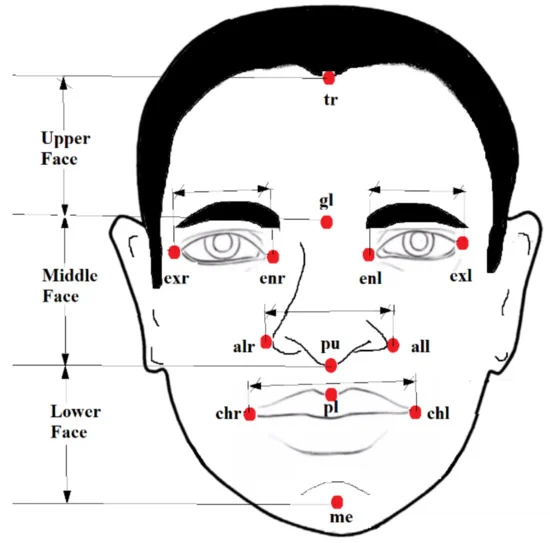

### **3.2 Trích xuất các features để phân tích dữ liệu**

#### **Trích xuất tuổi và giới tính**

In [ ]:
faceProto = "modelNweight/opencv_face_detector.pbtxt"
faceModel = "modelNweight/opencv_face_detector_uint8.pb"

ageProto = "modelNweight/age_deploy.prototxt"
ageModel = "modelNweight/age_net.caffemodel"

genderProto = "modelNweight/gender_deploy.prototxt"
genderModel = "modelNweight/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load network
ageNet = cv2.dnn.readNet(ageModel, ageProto)
genderNet = cv2.dnn.readNet(genderModel, genderProto)
faceNet = cv2.dnn.readNet(faceModel, faceProto)
padding = 20

In [ ]:
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv2.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

#Nhận diện tuổi và giới tính
def age_gender_detector(frame):

    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        face = frame[max(0, bbox[1]-padding):min(bbox[3]+padding, frame.shape[0]-1),
                     max(0, bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        if not face.size or face.shape[0] == 0 or face.shape[1] == 0:
            continue

        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]


    return age, gender

#### **Trích xuất các đặc điểm chi tiết trên khuôn mặt**

Với những đặc điểm trên khuôn mặt để dễ dàng phân tích và nhận dạng một số khác biệt giữa người bình thường và người mặc chứng rối loại phổ tự kỷ qua một số đặc trưng như sau:

+ Khoảng cách giữa 2 mắt.
+ Chiều cao nửa mặt trên.
+ Chiều cao mặt giữa.
+ Chiều rộng miệng.
+ Độ dài nhân trung.

Nhận thấy có sự khác biệt giữa khoảng cách giữa các bộ phận ở góc mặt nghiêng và mặt chính diện. Khi mặt ở góc nghiêng thì một phần khuôn mặt sẽ bị khuất do đó khoảng cách thu được sẽ không được chính xác khi bộ dữ liệu gồm cả mặt nghiêng và mặt chính diện.

Ta thực hiện tính tỷ lệ các khoảng cách cần tính so với chiều rộng hoặc chiều cao tương ứng của khoảng cách (VD: Chiều rộng miệng so với chiều rộng khuôn mặt). Việc lấy tỷ lệ của các đặc trưng so với tỷ lệ tổng của khuôn mặt là một cách hiệu quả để giảm ảnh hưởng của kích thước tuyệt đối và đồng thời đảm bảo tính nhất quán khi xử lý cả mặt nghiêng và mặt chính diện. Tuy nhiên, nhận thấy rằng số lượng gương mặt nghiêng trong bộ data không quá đáng kể và để trực quan rõ ràng, cụ thể hơn từng khoảng cách số liệu cụ thể thì nhóm đã chọn cách trích xuất các khoảng cách này chỉ trên những khuôn mặt chính diện.

**Trích xuất khoảng cách của các features đối với các khuôn mặt chính diện:**

Sử dụng bộ xác định facial landmark của dlib là cài đặt của thuật toán được mô tả trong bài báo One Millisecond Face Alignment with an Ensemble of Regression Trees của Kazemi và Sullivan (2014).\
Bộ xác định facial landmark này sẽ xác định 81 điểm chính theo tọa độ (x,y) cấu tạo nên khuôn mặt người như hình bên dưới.



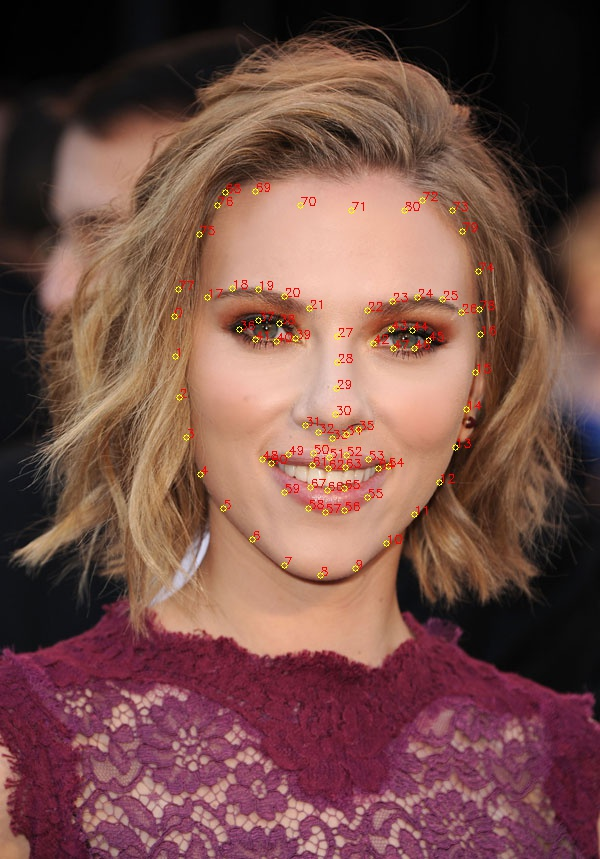

Nhận diện các khuôn mặt chính diện.

In [ ]:
# Tính toán góc giữa hai vectors
def calculate_angle(vector1, vector2):
    dot_product = sum(a*b for a, b in zip(vector1, vector2))
    magnitude1 = math.sqrt(sum(a**2 for a in vector1))
    magnitude2 = math.sqrt(sum(b**2 for b in vector2))
    cosine_similarity = dot_product / (magnitude1 * magnitude2)
    angle = math.degrees(math.acos(cosine_similarity))
    return angle

# Tính toán góc nghiêng của khuôn mặt
def calculate_face_orientation(landmarks):
    # Vectors đại diện cho mắt trái và mắt phải
    vector1 = [landmarks.part(27).x - landmarks.part(30).x, landmarks.part(27).y - landmarks.part(30).y] # tương ứng với sống mũi
    vector2 = [landmarks.part(31).x - landmarks.part(35).x, landmarks.part(31).y - landmarks.part(35).y] # tương ứng đường nối 2 cánh mũi
    # Tính toán góc giữa hai vectors
    angle = calculate_angle(vector1, vector2)

    return angle

In [ ]:
Non_Autistic_frontface = []
for img_path in Non_Autistic_image_paths:
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_81_face_landmarks.dat")


    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    for face in faces:
      landmarks = predictor(gray, face)
      face_orientation = calculate_face_orientation(landmarks)

      if face_orientation >= 80 and face_orientation <= 100:
          Non_Autistic_frontface.append(os.path.basename(img_path))

Non_Autistic_frontface_path = [os.path.join(Non_Autistic_path, filename) for filename in Non_Autistic_frontface]

In [ ]:
Autistic_frontface = []
for img_path in Autistic_image_paths:
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_81_face_landmarks.dat")


    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    for face in faces:
      landmarks = predictor(gray, face)
      face_orientation = calculate_face_orientation(landmarks)

      if face_orientation >= 80 and face_orientation <= 100:
          Autistic_frontface.append(os.path.basename(img_path))
Autistic_frontface_path = [os.path.join(Autistic_path, filename) for filename in Autistic_frontface]

**Tạo Dataframe và xuất file.csv**

In [ ]:
#Khoảng cách giữa 2 điểm trên khuôn mặt
def compute_distance(landmarks, point1, point2):
    x1, y1 = landmarks.part(point1).x, landmarks.part(point1).y
    x2, y2 = landmarks.part(point2).x, landmarks.part(point2).y
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance
# Chuẩn hóa ảnh bằng cách chuyển đổi giá trị pixel về khoảng 0-1.
def normalize_image(image):
    normalized_image = image.astype(np.float32) / 255.0
    return normalized_image

In [ ]:
def extract_facial_features(image_path):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_81_face_landmarks.dat")

    image = cv2.imread(image_path)

    img_name = os.path.basename(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    age_gender = age_gender_detector(image)
    image = normalize_image(image)
    faces = detector(gray)
    features_dict = {
        "Image_Name": img_name,
        "Age":age_gender[0],
        "Gender":age_gender[1],
        "Eyes_Distance": None,
        "Upper_Face": None,
        "Middle_Face": None,
        "Mouth_Width": None,
        "Philtrum_Length": None
    }
    for face in faces:
      landmarks = predictor(gray, face)

      eye_distance = compute_distance(landmarks, 39, 42)
      upper_face_length = compute_distance(landmarks, 17, 68)
      mid_face_height = compute_distance(landmarks, 33, 21)
      mouth_width = compute_distance(landmarks, 51, 33)
      philtrum_length = compute_distance(landmarks, 54, 48)

      features_dict["Eyes_Distance"] = eye_distance
      features_dict["Upper_Face"] = upper_face_length
      features_dict["Middle_Face"] = mid_face_height
      features_dict["Mouth_Width"] = mouth_width
      features_dict["Philtrum_Length"] = philtrum_length

    return features_dict

In [ ]:
df_Autistic = pd.DataFrame(columns=["Image_Name","Age","Gender", "Eyes_Distance", "Upper_Face", "Middle_Face", "Mouth_Width", "Philtrum_Length"])
for image_path in Autistic_frontface_path:
    features_dict = extract_facial_features(image_path)
    if features_dict is not None:
        df_Autistic = df_Autistic.append(features_dict, ignore_index=True)

path = "/content/drive/MyDrive/Project_Python_DS/cleanData/Autistic.csv"
df_Autistic.to_csv(path, index=False)

In [ ]:
df_Non_Autistic = pd.DataFrame(columns=["Image_Name","Age", "Gender", "Eyes_Distance", "Upper_Face", "Middle_Face","Mouth_Width", "Philtrum_Length"])
for image_path in Non_Autistic_frontface_path:
    features_dict = extract_facial_features(image_path)
    if features_dict is not None:
        df_Non_Autistic = df_Non_Autistic.append(features_dict, ignore_index=True)

path = "/content/drive/MyDrive/Project_Python_DS/cleanData/Non_Autistic.csv"
df_Non_Autistic.to_csv(path, index=False)

### **3.3 Phân tích dữ liệu(EDA)**

**a. Dữ liệu thống kê**

In [ ]:
# Đọc dữ liệu từ file CSV
autistic_data = pd.read_csv('/content/drive/MyDrive/Project_Python_DS/cleanData/Autistic.csv')
non_autistic_data = pd.read_csv('/content/drive/MyDrive/Project_Python_DS/cleanData/Non_Autistic.csv')
non_autistic_data = non_autistic_data.dropna()
autistic_data = autistic_data.dropna()

In [ ]:
autistic_data.head(5)

,Image_Name,Age,Gender,Eyes_Distance,Upper_Face,Middle_Face,Mouth_Width,Philtrum_Length
0,0088.jpg,(38-43),Female,75.001214,89.490808,141.038290,117.763863,21.950615
1,0744.jpg,(8-12),Female,69.405488,80.068666,127.759421,114.248824,23.774242
2,1209.jpg,(0-2),Male,73.747300,87.520416,137.051851,101.389761,30.808667
3,1112.jpg,(0-2),Female,86.515237,104.917846,162.920422,120.725340,30.809687
4,1500.jpg,(4-6),Female,67.255315,81.731598,126.578910,109.644213,22.662864


In [ ]:
non_autistic_data.head(5)

,Image_Name,Age,Gender,Eyes_Distance,Upper_Face,Middle_Face,Mouth_Width,Philtrum_Length
0,1137.jpg,(4-6),Male,63.068294,75.992540,128.091705,101.789013,22.265714
1,0585.jpg,(25-32),Female,68.640679,89.924669,150.578041,94.520663,28.553654
2,0537.jpg,(38-43),Female,73.389955,90.916193,141.430076,112.886247,26.063220
3,0338.jpg,(4-6),Female,66.684275,88.515239,140.384147,118.919065,16.926151
4,1466.jpg,(4-6),Male,73.130390,96.549367,151.675503,110.465555,23.291042


In [ ]:
# Mô tả thống kê về các đặc trưng
print("\nMô tả thống kê về dữ liệu autistic:")
print(autistic_data.describe())
print("\nMô tả thống kê về dữ liệu non-autistic:")
print(non_autistic_data.describe())


Mô tả thống kê về dữ liệu autistic:
       Eyes_Distance  Upper_Face  Middle_Face  Mouth_Width  Philtrum_Length
count     700.000000  700.000000   700.000000   700.000000       700.000000
mean       70.893416   84.538223   134.936043   103.851196        25.748821
std         6.628104    8.540318    10.818394    13.517791         3.739646
min        51.606829   61.277087   104.615536    61.812526        15.206556
25%        66.874013   78.562740   126.725532    94.173185        23.018960
50%        71.171487   84.559250   135.331525   103.470412        25.582230
75%        75.167405   90.162637   142.219730   112.874497        28.361997
max        90.524149  112.376717   168.318571   141.865938        37.241868

Mô tả thống kê về dữ liệu non-autistic:
       Eyes_Distance  Upper_Face  Middle_Face  Mouth_Width  Philtrum_Length
count     700.000000  700.000000   700.000000   700.000000       700.000000
mean       68.812811   83.451200   136.785605   102.037091        23.033867
std       

**b. Trực quan hóa dữ liệu**

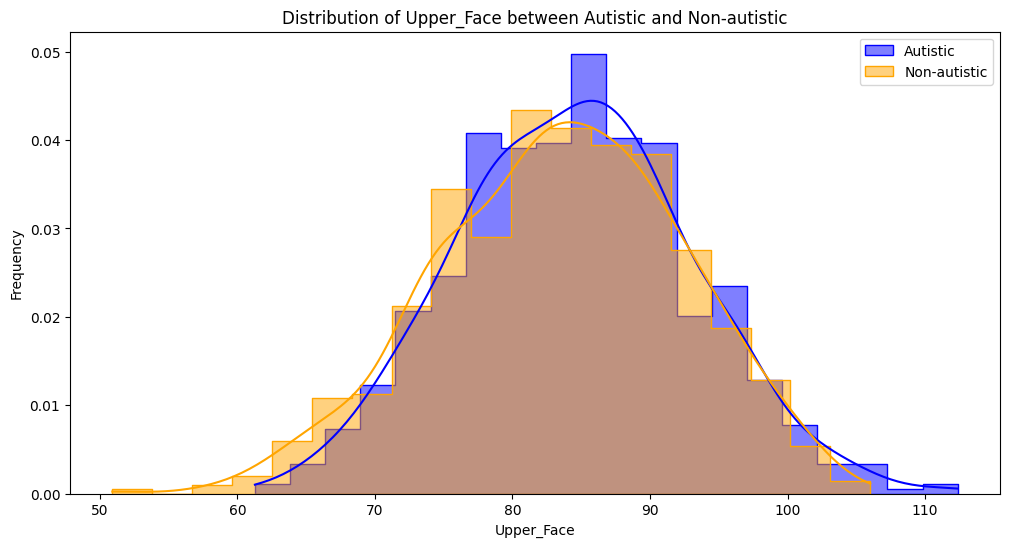

In [ ]:
# Phân tích đặc trưng cụ thể, ví dụ: mặt trên
feature_of_interest = 'Upper_Face'

# So sánh phân phối của đặc trưng giữa hai nhóm
plt.figure(figsize=(12, 6))
sns.histplot(autistic_data[feature_of_interest], label='Autistic', kde=True, element='step', stat='density', common_norm=False, color='blue', alpha=0.5)
sns.histplot(non_autistic_data[feature_of_interest], label='Non-autistic', kde=True, element='step', stat='density', common_norm=False, color='orange', alpha=0.5)
plt.title(f'Distribution of {feature_of_interest} between Autistic and Non-autistic')
plt.xlabel(feature_of_interest)
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Tạo một Series chứa dữ liệu về Uper_Face từ tập dữ liệu tự kỉ
Upper_Face_autistic = autistic_data['Upper_Face']

Upper_Face_non_autistic = non_autistic_data['Upper_Face']

t_statistic, p_value = stats.ttest_ind(Upper_Face_autistic, Upper_Face_non_autistic,alternative='greater')

# In kết quả
print("Giá trị t-statistic:", t_statistic)
print("p-value:", p_value)

# Kiểm tra giả thuyết
alpha = 0.05
if p_value < alpha:
    print("Có đủ bằng chứng để tin rằng Upper_Face của tập `autistic_data` lớn hơn `non_autistic_data` với độ tin cậy 95%.")
else:
    print("Không đủ bằng chứng để tin rằng Upper_Face của tập `autistic_data` lớn hơn `non_autistic_data` với độ tin cậy 95%.")

Giá trị t-statistic: 2.316935528475352
p-value: 0.010325576310026308
Có đủ bằng chứng để tin rằng Upper_Face của tập `autistic_data` lớn hơn `non_autistic_data` với độ tin cậy 95%.


Chỉ với biểu đồ trên, ta khó có thể nhận thấy sự khác biệt giữa autism và non_autism. Nhưng với kiểm định trung bình này, ta có thể thấy được sự khác biệt đó.

Thực hiện trực quan và kiểm định với các khoảng cách còn lại.

Giá trị t-statistic: -3.089674864119002
p-value: 0.0010216387860332748
Có đủ bằng chứng để tin rằng Middle_Face của tập `autistic_data` nhỏ hơn `non_autistic_data` với độ tin cậy 95%.


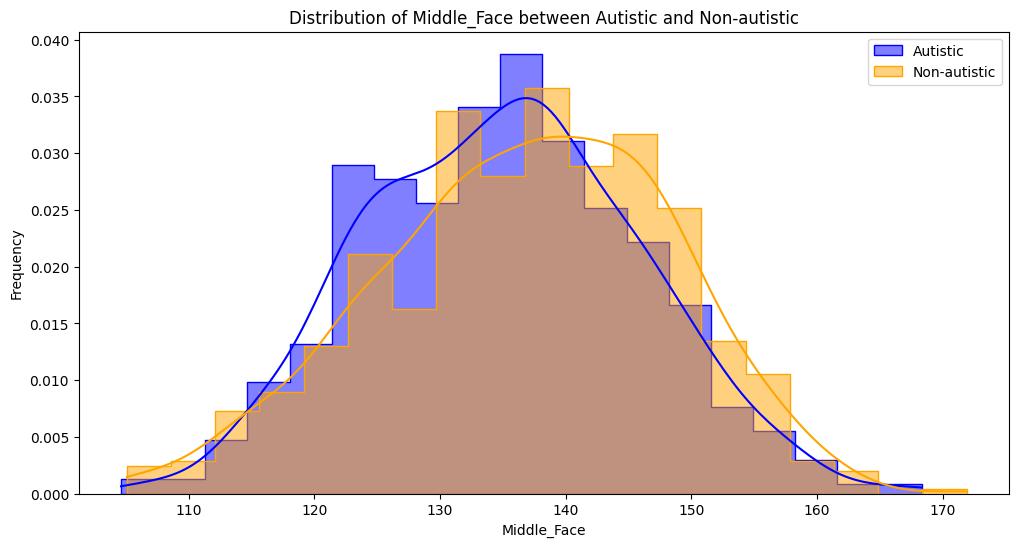

In [ ]:
# Tạo một Series chứa dữ liệu về Middle_Face từ tập dữ liệu tự kỉ
Middle_Face_autistic = autistic_data['Middle_Face']

Middle_Face_non_autistic = non_autistic_data['Middle_Face']

# Sử dụng kiểm định t Student độc lập
t_statistic, p_value = stats.ttest_ind(Middle_Face_autistic, Middle_Face_non_autistic,alternative='less')

# In kết quả
print("Giá trị t-statistic:", t_statistic)
print("p-value:", p_value)

# Kiểm tra giả thuyết
alpha = 0.05
if p_value < alpha:
    print("Có đủ bằng chứng để tin rằng Middle_Face của tập `autistic_data` nhỏ hơn `non_autistic_data` với độ tin cậy 95%.")
else:
    print("Không đủ bằng chứng để tin rằng Middle_Face của tập `autistic_data` nhỏ hơn `non_autistic_data` với độ tin cậy 95%.")
# Phân tích đặc trưng cụ thể, ví dụ: mặt giữa
feature_of_interest = 'Middle_Face'

# So sánh phân phối của đặc trưng giữa hai nhóm
plt.figure(figsize=(12, 6))
sns.histplot(autistic_data[feature_of_interest], label='Autistic', kde=True, element='step', stat='density', common_norm=False, color='blue', alpha=0.5)
sns.histplot(non_autistic_data[feature_of_interest], label='Non-autistic', kde=True, element='step', stat='density', common_norm=False, color='orange', alpha=0.5)
plt.title(f'Distribution of {feature_of_interest} between Autistic and Non-autistic')
plt.xlabel(feature_of_interest)
plt.ylabel('Frequency')
plt.legend()
plt.show()

Giá trị t-statistic: 2.5916802753254626
p-value: 0.004825170279068688
Có đủ bằng chứng để tin rằng Mouth_Width của tập `autistic_data` lớn hơn `non_autistic_data` với độ tin cậy 95%.


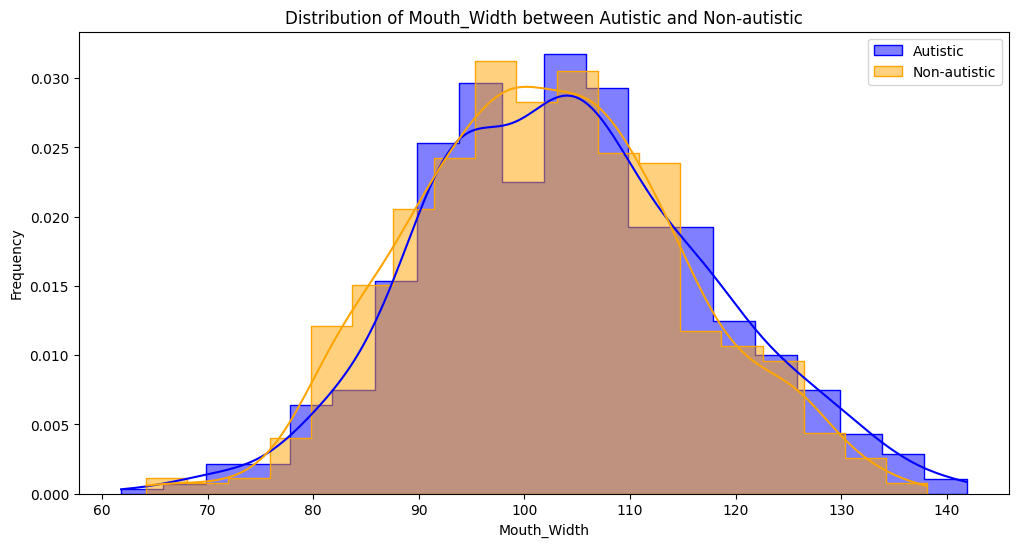

In [ ]:
# Tạo một Series chứa dữ liệu về Mouth_Width từ tập dữ liệu tự kỉ
Mouth_Width_autistic = autistic_data['Mouth_Width']

Mouth_Width_non_autistic = non_autistic_data['Mouth_Width']

# Sử dụng kiểm định t Student độc lập
t_statistic, p_value = stats.ttest_ind(Mouth_Width_autistic, Mouth_Width_non_autistic,alternative='greater')

# In kết quả
print("Giá trị t-statistic:", t_statistic)
print("p-value:", p_value)

# Kiểm tra giả thuyết
alpha = 0.05
if p_value < alpha:
    print("Có đủ bằng chứng để tin rằng Mouth_Width của tập `autistic_data` lớn hơn `non_autistic_data` với độ tin cậy 95%.")
else:
    print("Không đủ bằng chứng để tin rằng Mouth_Width của tập `autistic_data` lớn hơn `non_autistic_data` với độ tin cậy 95%.")

# Phân tích đặc trưng cụ thể, ví dụ: chiều rộng miệng
feature_of_interest = 'Mouth_Width'

# So sánh phân phối của đặc trưng giữa hai nhóm
plt.figure(figsize=(12, 6))
sns.histplot(autistic_data[feature_of_interest], label='Autistic', kde=True, element='step', stat='density', common_norm=False, color='blue', alpha=0.5)
sns.histplot(non_autistic_data[feature_of_interest], label='Non-autistic', kde=True, element='step', stat='density', common_norm=False, color='orange', alpha=0.5)
plt.title(f'Distribution of {feature_of_interest} between Autistic and Non-autistic')
plt.xlabel(feature_of_interest)
plt.ylabel('Frequency')
plt.legend()
plt.show()

Giá trị t-statistic: 6.035659048694492
p-value: 1.0123366250655994e-09
Có đủ bằng chứng để tin rằng Eyes_Distance của tập `autistic_data` lớn hơn `non_autistic_data` với độ tin cậy 95%.


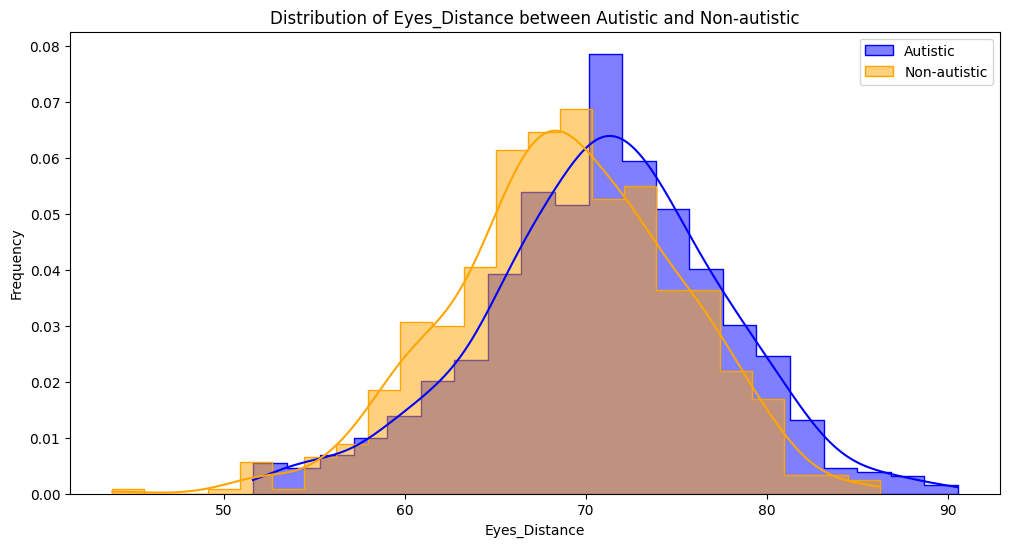

In [ ]:
# Tạo một Series chứa dữ liệu về Eyes_Distance từ tập dữ liệu tự kỉ
eyes_distance_autistic = autistic_data['Eyes_Distance']

eyes_distance_non_autistic = non_autistic_data['Eyes_Distance']

# Sử dụng kiểm định t Student độc lập
t_statistic, p_value = stats.ttest_ind(eyes_distance_autistic, eyes_distance_non_autistic,alternative='greater')

# In kết quả
print("Giá trị t-statistic:", t_statistic)
print("p-value:", p_value)

# Kiểm tra giả thuyết
alpha = 0.05
if p_value < alpha:
    print("Có đủ bằng chứng để tin rằng Eyes_Distance của tập `autistic_data` lớn hơn `non_autistic_data` với độ tin cậy 95%.")
else:
    print("Không đủ bằng chứng để tin rằng Eyes_Distance của tập `autistic_data` lớn hơn `non_autistic_data` với độ tin cậy 95%.")
# Phân tích đặc trưng cụ thể, ví dụ: mắt trong
feature_of_interest = 'Eyes_Distance'

# So sánh phân phối của đặc trưng giữa hai nhóm
plt.figure(figsize=(12, 6))
sns.histplot(autistic_data[feature_of_interest], label='Autistic', kde=True, element='step', stat='density', common_norm=False, color='blue', alpha=0.5)
sns.histplot(non_autistic_data[feature_of_interest], label='Non-autistic', kde=True, element='step', stat='density', common_norm=False, color='orange', alpha=0.5)
plt.title(f'Distribution of {feature_of_interest} between Autistic and Non-autistic')
plt.xlabel(feature_of_interest)
plt.ylabel('Frequency')
plt.legend()
plt.show()

Giá trị t-statistic: 12.9798092776636
p-value: 9.282324832344065e-37
Có đủ bằng chứng để tin rằng Philtrum_Length của tập `autistic_data` lớn hơn `non_autistic_data` với độ tin cậy 95%.


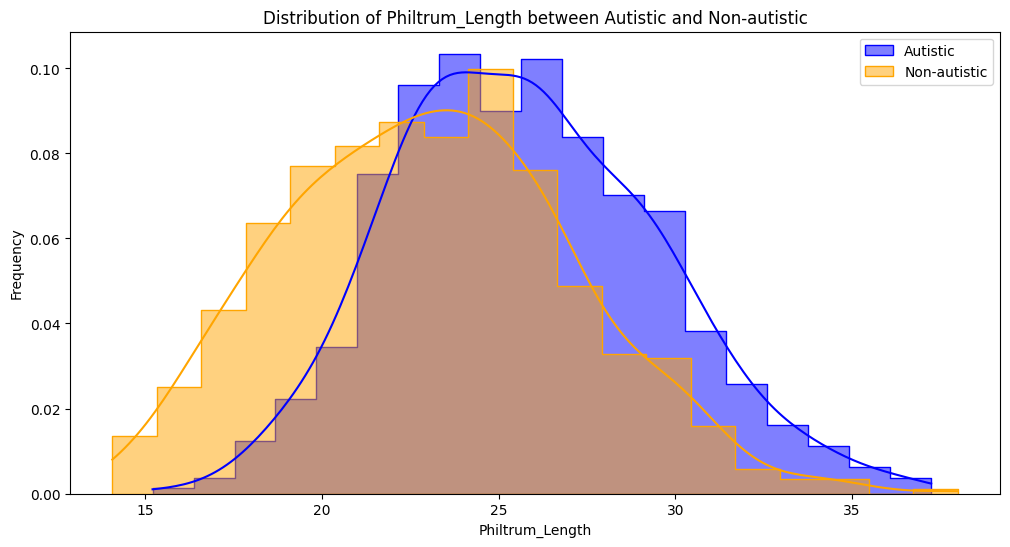

In [ ]:
# Tạo một Series chứa dữ liệu về Eyes_Distance từ tập dữ liệu tự kỉ
Philtrum_Length_autistic = autistic_data['Philtrum_Length']

Philtrum_Length_non_autistic = non_autistic_data['Philtrum_Length']

# Sử dụng kiểm định t Student độc lập
t_statistic, p_value = stats.ttest_ind(eyes_distance_autistic, eyes_distance_non_autistic,alternative='greater')

# In kết quả
print("Giá trị t-statistic:", t_statistic)
print("p-value:", p_value)

# Kiểm tra giả thuyết
alpha = 0.05
if p_value < alpha:
    print("Có đủ bằng chứng để tin rằng Philtrum_Length của tập `autistic_data` lớn hơn `non_autistic_data` với độ tin cậy 95%.")
else:
    print("Không đủ bằng chứng để tin rằng Philtrum_Length của tập `autistic_data` lớn hơn `non_autistic_data` với độ tin cậy 95%.")
# Phân tích đặc trưng cụ thể, ví dụ: nhân trung
feature_of_interest = 'Philtrum_Length'

# So sánh phân phối của đặc trưng giữa hai nhóm
plt.figure(figsize=(12, 6))
sns.histplot(autistic_data[feature_of_interest], label='Autistic', kde=True, element='step', stat='density', common_norm=False, color='blue', alpha=0.5)
sns.histplot(non_autistic_data[feature_of_interest], label='Non-autistic', kde=True, element='step', stat='density', common_norm=False, color='orange', alpha=0.5)
plt.title(f'Distribution of {feature_of_interest} between Autistic and Non-autistic')
plt.xlabel(feature_of_interest)
plt.ylabel('Frequency')
plt.legend()
plt.show()

=> **Từ đó chúng ta có thể hình dung tương đối về khuôn mặt của những đứa trẻ là phần mặt trên rộng hơn, phần mặt giữa ngắn hơn, phần mắt rộng hơn, miệng rộng hơn và nhân trung rộng hơn là một số đặc điểm trên khuôn mặt thường thấy ở trẻ mắc ASD**
